# Convolution and Pooling

The functional API is rather gnarly, so I'll simply show an example with that.  

In [1]:
import ncdl
import torch
from ncdl import Lattice, LatticeTensor, Stencil
import ncdl.nn as ncnn

from utility import visualize_lattice

qc = Lattice("qc")

Define a stencil and a convolution.

In [2]:
stencil = Stencil([
    (0, 0), (2, 0), (0, 2), (2, 2), (1, 1)
], qc, center=(1,1))

lc = ncnn.LatticeConvolution(qc, 8, 16, stencil)

Now define an example lattice tensor

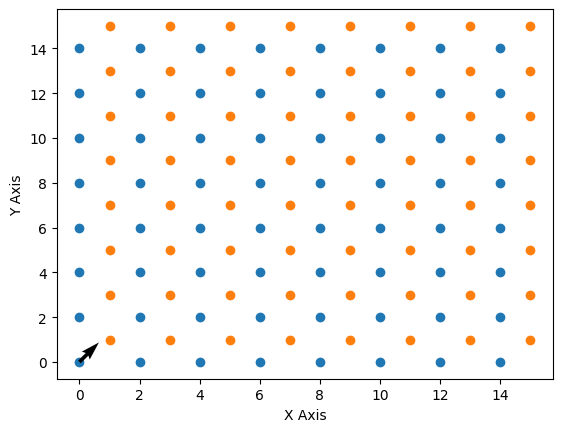

In [3]:
blue_coset = torch.rand(4, 8, 8, 8)
orange_coset = torch.rand(4, 8, 8, 8)

lt = qc(
    blue_coset, 
    orange_coset
) 
visualize_lattice(lt)

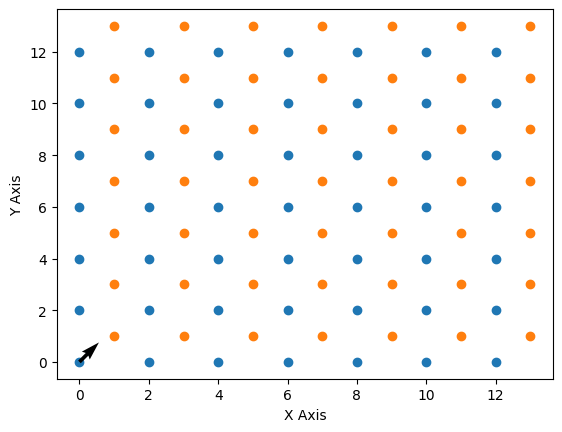

In [4]:
lto = lc(lt)
visualize_lattice(lto)

Notice that we lost some data on the right side of the lattice tensor. This is expected; this happens with normal cartesian convolution, too. If you want to retain the same dimensions, you need to pad. The stencil instance has a utility method for this.

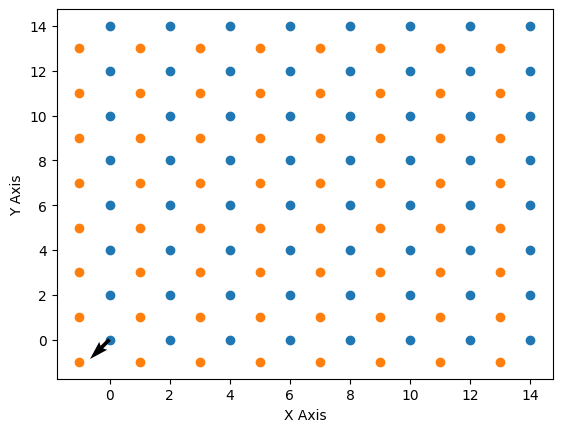

In [5]:
lto = lc(lt)
visualize_lattice(stencil.pad_lattice_tensor(lto))

Padding is sensitive to the "center" of the stencil. The center basically ensures that data are not shifted around. Pooling is conceptually similar.

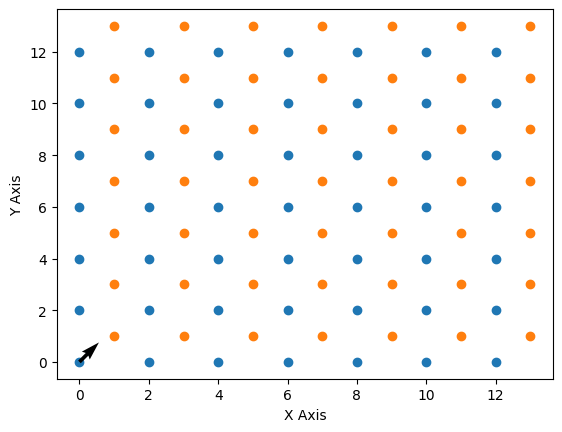

In [6]:
lp = ncnn.LatticeMaxPooling(qc, stencil)

lto = lp(lt)
visualize_lattice(lto)